<a href="https://githubtocolab.com/borislevant/python4cv/blob/main/basic_image_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Basic Image Operations with OpenCV-Python
## by Dr. Boris Levant

[![scikit-learn logo](./img/opencv-logo-small.png)](https://docs.opencv.org/3.4/d0/de3/tutorial_py_intro.html)

There are few packages in Python that are built to work with images: ```OpenCV```, ```Scikit-Image``` and ```Pillow```. In this session we will learn the basic image operaitons using the OpenCV and in particular it's Python API - ```OpenCV-Python```. 

OpenCV was started at Intel in 1999 by Gary Bradsky, and the first release came out in 2000. Vadim Pisarevsky joined Gary Bradsky to manage Intel's Russian software OpenCV team. In 2005, OpenCV was used on Stanley, the vehicle that won the 2005 DARPA Grand Challenge. Later, its active development continued under the support of Willow Garage with Gary Bradsky and Vadim Pisarevsky leading the project. OpenCV now supports a multitude of algorithms related to Computer Vision and Machine Learning and is expanding day by day.

OpenCV supports a wide variety of programming languages such as C++, Python, Java, etc., and is available on different platforms including Windows, Linux, OS X, Android, and iOS. Interfaces for high-speed GPU operations based on CUDA and OpenCL are also under active development. OpenCV-Python is the Python API for OpenCV, combining the best qualities of the OpenCV C++ API and the Python language.

To install ```OpenCV-Python``` we run
```
pip install opencv-python 
```
In order to ensure that we have installed the package correctly, lets run the following code


In [3]:
import cv2
cv2.__version__

'4.7.0'

We will also need the following packages to manipulate the images and to display the images inside the Jupyter notebook


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Read, Save and Display Images

In this section we will learn how to read and display images using OpenCV. In order to do it we will use the function ```imread```. It accepts 2 parameters. The first one is the path to the image file and the second one is the format of the image we want to load that can have 3 values:
* ```cv2.IMREAD_COLOR```: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag
* ```cv2.IMREAD_GRAYSCALE```: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag
* ```cv2.IMREAD_UNCHANGED```: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag

The following code reads the image in the gray-scale mode and printsthe size of the image object - which is the 2D array - the first coordinate representing the *Y* and the second is *X*. The type of the array is unsigned integer of size byte


In [22]:
img = cv2.imread('img/cute_dog_small.jpg', cv2.IMREAD_GRAYSCALE)
print(f'The shape of the img object is {img.shape}')
print(f'The type of the img object is {img.dtype}')

The shape of the img object is (418, 627)
The type of the img object is uint8


Next we would like to display the image in the notebook. We will use the ```Matplotlib``` function ```imshow```. Displaying the grayscale images in addition to the image itself, requires to specify the color map in which we want to show the image. Below we will use a few examples. Please, try to experiment with different values of the color maps, as found in the ```Matplotlib``` tutorial: https://matplotlib.org/stable/tutorials/colors/colormaps.html


Text(0.5, 1.0, 'plasma')

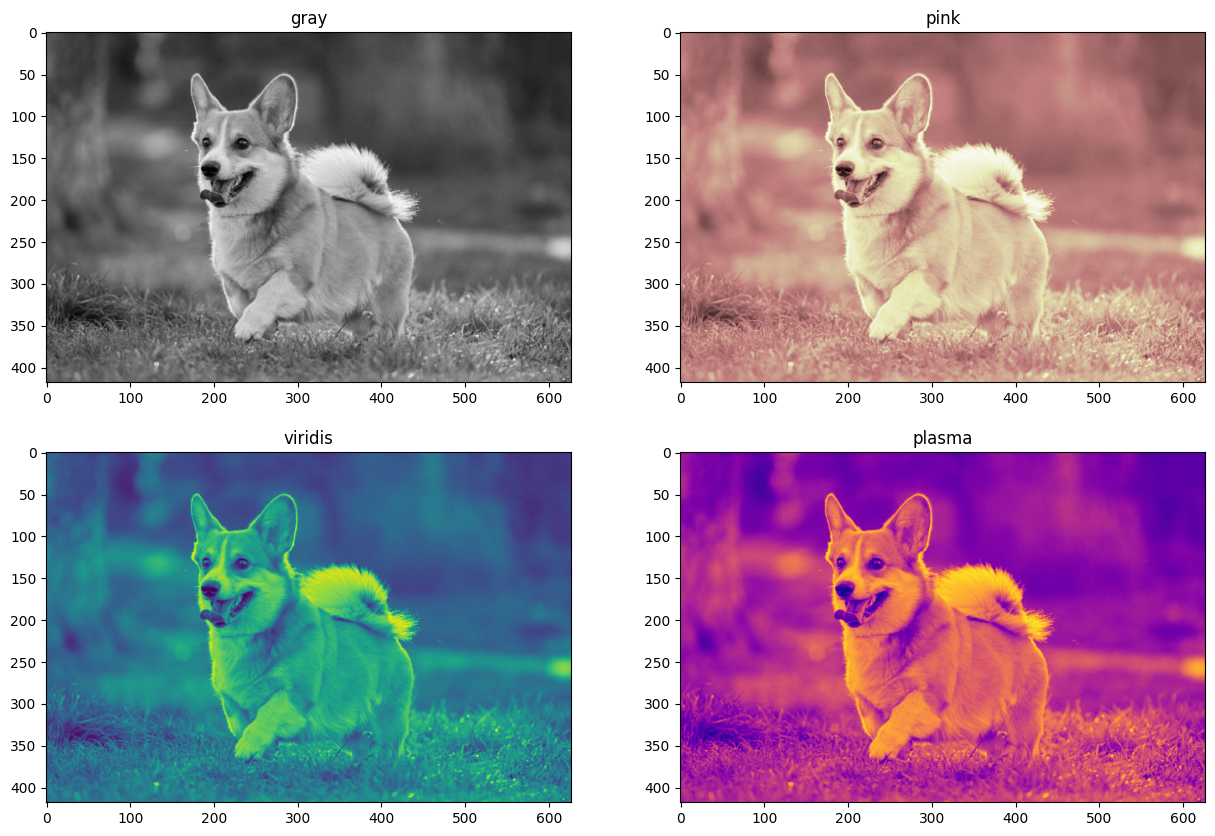

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('gray')
ax[0, 1].imshow(img, cmap='pink')
ax[0, 1].set_title('pink')
ax[1, 0].imshow(img, cmap='viridis')
ax[1, 0].set_title('viridis')
ax[1, 1].imshow(img, cmap='plasma')
ax[1, 1].set_title('plasma')


Now let's read the image as a color. This time we see that the image is a 3D array - third dimension represents the color

In [21]:
imgc = cv2.imread('img/cute_dog_small.jpg', cv2.IMREAD_COLOR)
print(f'The shape of the img object is {imgc.shape}')

The shape of the img object is (418, 627, 3)


By default, the OpenCV images are stored in the BGR format - Blue, Green and Red. In order to convert them to the more familiar RGB, we need to use the function ```cvtColor```. It is used to convert between different color spaces and we will use it in the future

In order to show examples we will implement the following function that will show the pairs of the images

In [36]:
def imshow_filters(im, filter_func, name):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    ax[0].imshow(im)
    ax[0].set_title('Original Image')
    ax[1].imshow(filter_func(im))
    ax[1].set_title(name)
    plt.show()


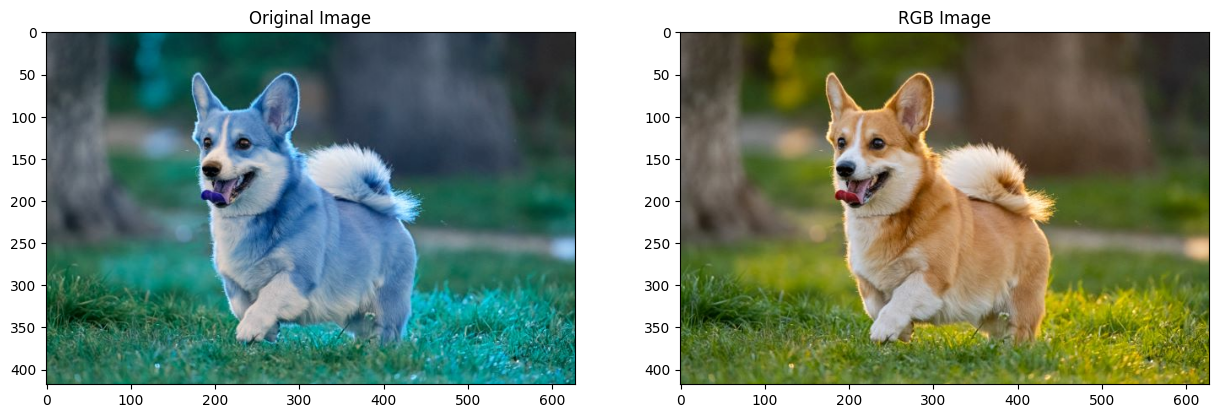

In [37]:
imshow_filters(imgc, lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), 'RGB Image')

In order to save the image we use the function ```imwrite``` accepting the filename and the image itself. The format of the image to be saved is determined by the extension of the file name: jpg, png, tiff, etc. The function returns the status of the operation: True/False


In [38]:
status = cv2.imwrite('img/cute_dog_gray.jpg', img)
print(f'The operation was successfull?: {status}')


The operation was successfull?: True


## Smoothing


Image smoothing is an image processing technique used for removing the noise in an image.Blurring(smoothing) removes low-intensity edges and is also beneficial in hiding the details; for example, blurring is required in many cases, such as hiding any confidential information in an image.OpenCV provides mainly the following type of blurring techniques.

Here are a few of the methods that we are going to use for smoothing an image:

* OpenCV averaging
* OpenCV median Blur
* OpenCV Gaussian Blur
* OpenCV Bilateral Filter


### Adding the noise to the image

In order to add the noise to the image we will use the 
Let's cut the portion of the image (the head of the dog) and add some noise to see how each filtering technique
* Clears the noise
* Affects the blurriness of the image

In order to create the Gaussian noise, we first create the noise of the size of the image

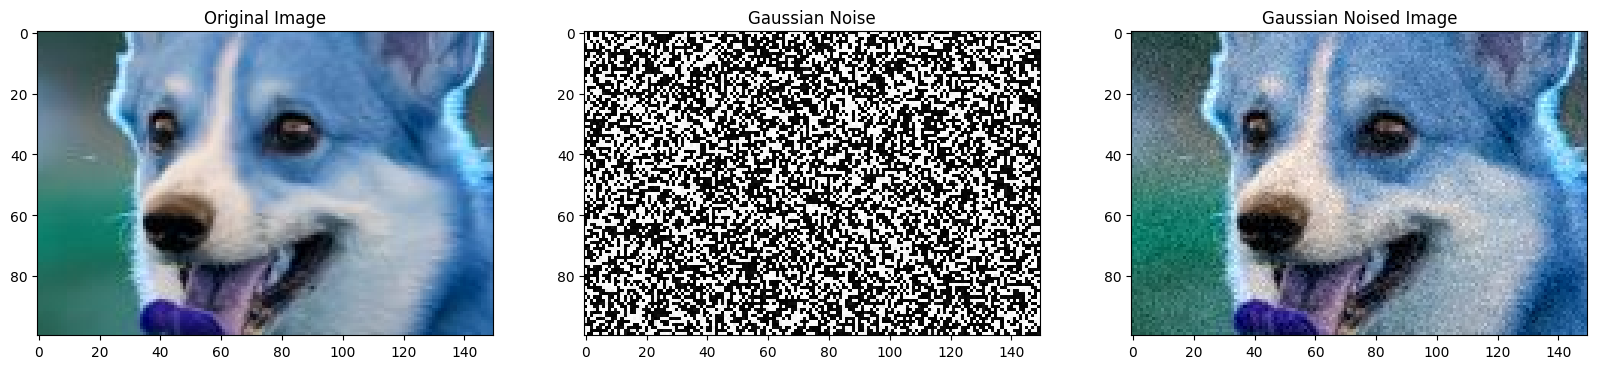

In [216]:
imhead = imgc[100:200, 150:300, :].copy()
gauss = np.random.normal(0, 10, imhead.shape[:2]).astype(np.float32)

imhead_noisy = imhead.astype(np.float32).copy()
imhead_noisy[:, :, 0] = imhead_noisy[:, :, 0] + gauss
imhead_noisy[:, :, 1] = imhead_noisy[:, :, 1] + gauss
imhead_noisy[:, :, 2] = imhead_noisy[:, :, 2] + gauss
imhead_noisy = np.clip(imhead_noisy, 0, 255).astype(np.uint8)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax[0].imshow(imhead)
ax[0].set_title('Original Image')
ax[1].imshow(gauss.astype(np.uint8), cmap='gray')
ax[1].set_title('Gaussian Noise')
ax[2].imshow(imhead_noisy)
ax[2].set_title('Gaussian Noised Image')
plt.show()


In [214]:
from ipywidgets import interact
import ipywidgets as widgets


### Average smoothing

In this technique, we normalize the image with a box filter. It calculates the average of all the pixels which are under the kernel area(box filter) and replaces the value of the pixel at the center of the box filter with the calculated average. OpenCV provides the cv2.blur() to perform this operation. 
$$
K = \frac{1}{H\cdot W} \left[ {\begin{array}{cccc}
    1 & 1 & \cdots & 1 \newline
    1 & 1 & \cdots & 1 \newline
    \vdots & \vdots & \ddots & \vdots \newline
    1 & 1 & \cdots & 1 \newline
  \end{array} } \right]
$$
while the size of the kernel is $H \times W$.

The syntax of cv2.blur() function is as follows
```
cv2.blur(src, ksize, anchor, borderType)
```

Parameters:

* *src*: It is the image which is to be blurred
* *ksize*: A tuple representing the blurring kernel size $H\times W$
* *anchor*: It is a variable of type integer representing anchor point and it’s default value Point is (-1, -1) which means that the anchor is at the kernel center
* *borderType*: It represents the type of border to be used for the output


In [225]:
def show_average_filter(ksize=5):
    imshow_filters(imhead_noisy, lambda x: cv2.blur(x, (ksize, ksize), borderType=cv2.BORDER_CONSTANT), f'Image Average Filter ({ksize}, {ksize})')
    
interact(show_average_filter, ksize=(1, 15, 2))

interactive(children=(IntSlider(value=5, description='ksize', max=15, min=1, step=2), Output()), _dom_classes=…

<function __main__.show_average_filter(ksize=5)>

### Gaussian filter

In this technique, a Gaussian function(kernel) instead of a box filter to blur the image. The width and height of the kernel needs to be specified and they should be positive and odd. We also have to specify the standard deviation in the directions X and Y and are represented by sigmaX and sigmaY respectively. If both sigmaX and sigmaY are given as zeros, they are calculated from the kernel size and if we only specify sigmaX, sigmaY is set to the same value. Gaussian blurring is highly effective when removing Gaussian noise from an image. In OpenCV we have a function GaussianBlur() to implement this technique easily. Here is the syntax:
```
GaussianBlur(src, ksize, sigmaX, sigmaY)
```

Parameters:

* src − Input image which is to be blurred
* ksize − A Size object representing the size of the kernel.
* sigmaX − A variable of the type double representing the Gaussian kernel standard deviation in X direction.
* sigmaY − A variable of the type double representing the Gaussian kernel standard deviation in Y direction.


In [226]:
def show_gaussian_filter(ksize=5):
    imshow_filters(imhead_noisy, lambda x: cv2.GaussianBlur(x, (ksize, ksize), 0, 0), f'Image Gaussian Filter of size {ksize}')
    
interact(show_gaussian_filter, ksize=(1, 15, 2))


interactive(children=(IntSlider(value=5, description='ksize', max=15, min=1, step=2), Output()), _dom_classes=…

<function __main__.show_gaussian_filter(ksize=5)>

### Median Blur

In this technique, the median of all the pixels under the kernel window is computed and the central pixel is replaced with this median value. It has one advantage over the Gaussian and box filters, that being the filtered value for the central element is always replaced by some pixel value in the image which is not the case in case of either Gaussian or box filters. OpenCV provides a function medianBlur() that can be used to easily implement this kind of smoothing. Here is the syntax:
```
cv2.medianBlur(src, dst, ksize)  
```

Parameters:

* src- It represents the source (input image).
* dst – It represents the destination (output image).
* ksize – It represents the size of the kernel.


In [223]:
def show_median_filter(ksize=5):
    imshow_filters(imhead_noisy, lambda x: cv2.medianBlur(x, ksize), f'Image Median Filter of size {ksize}')
    
interact(show_median_filter, ksize=(1, 15, 2))


interactive(children=(IntSlider(value=5, description='ksize', max=15, min=1, step=2), Output()), _dom_classes=…

<function __main__.show_median_filter(ksize=5)>

### Bilateral filter

This method of noise removal is highly effective but is slower compared to other filters. The Gaussian filter blurred the edges too and that is not what we want, but this filter makes sure that only those pixels with similar intensities to the central pixel are considered for blurring, thus preserving the edges since pixels at edges will have large intensity variation. In OpenCV we have cv.bilateralFilter() method that can implement this filter. Here is the syntax:
```
cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, borderType)
```
A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Crucially, the weights depend not only on Euclidean distance of pixels, but also on the radiometric differences (e.g., range differences, such as color intensity, depth distance, etc.). This preserves sharp edges.

Parameters:

* src Source 8-bit or floating-point, 1-channel or 3-channel image.
* d Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
* sigmaColor Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
* sigmaSpace Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
borderType border mode used to extrapolate pixels outside of the image, see the BorderTypes available here.


In [224]:
def show_bilateral_filter(ksize=5):
    imshow_filters(imhead_noisy, lambda x: cv2.bilateralFilter(x, ksize, 30, 30), f'Image Bilateral Filter of size {ksize}')
    
interact(show_bilateral_filter, ksize=(1, 15, 2))


interactive(children=(IntSlider(value=5, description='ksize', max=15, min=1, step=2), Output()), _dom_classes=…

<function __main__.show_bilateral_filter(ksize=5)>

## Upsampling

Usually when working on images, we often need to resize the images according to certain requirements. Mostly you will do such operation in Machine learning and deep learning as it reduces the time of training of a neural network. As the number of pixels in an image increases, the more is the number of input nodes that in turn increases the complexity of the model. We use an inbuilt resize() method to resize an image.

Syntax:
```
cv2.resize(s, size, fx, fy, interpolation)  
```

Parameters:

* s – input image (required).
* size – desired size for the output image after resizing (required)
* fx – Scale factor along the horizontal axis (optional)
* fy – Scale factor along the vertical axis (optional)

In order to resize we willl ned to interpolate the image using one of the following methods:
* INTER_NEAREST – a nearest-neighbor interpolation
* INTER_LINEAR – a bilinear interpolation (used by default) 
* INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
* INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood 
* INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

Here is an example of how we can use this method:


In [169]:
imhead_double = cv2.resize(imhead, (0, 0), fx=3, fy=3, interpolation=cv2.INTER_LINEAR)
print(f'The size of the original image is {imhead.shape}, the new image is {imhead_double.shape}')


The size of the original image is (100, 150, 3), the new image is (300, 450, 3)


Let's observe the effect of the different interpolation methods on the final image quality

In [227]:
def show_upsampled_image(ratio=3, interpolation_method=cv2.INTER_LINEAR):
    img_upsampled = cv2.resize(imhead, (0, 0), fx=ratio, fy=ratio, interpolation=interpolation_method)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].imshow(imhead[50:80, 30:60, :])
    ax[0].set_title('Original Image croped nose')
    ax[1].imshow(img_upsampled[50*ratio:80*ratio, 30*ratio:60*ratio, :])
    ax[1].set_title('Upsampled Image croped nose')
    plt.show()

interact(show_upsampled_image, ratio=(1, 7, 1), interpolation_method=[('INTER_NEAREST', cv2.INTER_NEAREST), ('INTER_LINEAR', cv2.INTER_LINEAR), ('INTER_CUBIC', cv2.INTER_CUBIC)]);


interactive(children=(IntSlider(value=3, description='ratio', max=7, min=1), Dropdown(description='interpolati…

## Downsampling

We can use the ```resize``` method to do Downsampling. In this part we will try to do the Downsampling manually


In [228]:
def show_downsampled_image(ratio=3):
    img_downsampled = imhead[::ratio, ::ratio, :]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].imshow(imhead)
    ax[0].set_title('Original Image')
    ax[1].imshow(img_downsampled)
    ax[1].set_title('Downsampled Image')
    plt.show()

interact(show_downsampled_image, ratio=(1, 5));


interactive(children=(IntSlider(value=3, description='ratio', max=5, min=1), Output()), _dom_classes=('widget-…

We observe that Dwonsampling increases the noise. Let's try to use the de-noising techniques to improve the downsampled image quality

In [230]:
def show_downsampled_denoised_image(ratio=3, kernel_size=5):
    imhead_noisy_smooth = cv2.GaussianBlur(imhead, (kernel_size, kernel_size), 0, 0).copy()
    img_downsampled = imhead_noisy_smooth[::ratio, ::ratio, :]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].imshow(imhead)
    ax[0].set_title('Original Image')
    ax[1].imshow(img_downsampled)
    ax[1].set_title('Downsampled Image')
    plt.show()

interact(show_downsampled_denoised_image, ratio=(1, 5), kernel_size=(3, 7, 2));


interactive(children=(IntSlider(value=3, description='ratio', max=5, min=1), IntSlider(value=5, description='k…